In [ ]:
!pip install torch networkx torch-geometric pennylane

In [ ]:
!pip install qiskit==1.1.0

In [ ]:
!pip install torchquantum

In [ ]:
!pip install qiskit-ibm-runtime

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data, Batch
from torch.utils.data import DataLoader, Subset

# Example data (replace with your actual dataset)
features = [
    [1.35861038e-01, 4.33190739e-01, 7.23854864e-01, 6.42867499e-01],
    [1.91416628e-01, 1.48580434e-01, 6.47027568e-01, 1.01263220e-03],
    [2.45159046e-02, 2.96262195e-01, 6.98300156e-01, 4.68653316e-01],
    [2.33411211e-01, 2.29922155e-02, 6.17154253e-01, 1.43750042e-01],
    [8.65225758e-03, 8.41720551e-03, 3.08829186e-01, 6.25104117e-01],
    [4.40873582e-02, 2.64421487e-02, 1.08695066e-02, 4.57901550e-02],
    [3.19866774e-01, 5.10297757e-01, 9.29257765e-02, 5.87295451e-01],
    [7.41897341e-01, 1.31248683e-01, 3.12081251e-01, 2.50288137e-01],
    [4.09967646e-01, 1.50511004e-01, 4.50170822e-01, 1.05786690e-01],
    [3.86397857e-01, 6.25510210e-02, 3.46820337e-01, 7.14295627e-01],
    [2.66177400e-01, 3.37566163e-02, 1.20424306e-01, 2.39210475e-01],
    [1.54736225e-01, 6.90052021e-02, 9.35892197e-03, 5.34491420e-02],
    [6.64768663e-02, 1.62425087e-01, 1.55037190e-01, 5.79719592e-01],
    [4.69672779e-01, 6.14861898e-01, 1.98803658e-01, 3.16083324e-01],
    [2.45746616e-02, 4.20866923e-01, 3.67888154e-01, 7.13204372e-01],
    [7.47500791e-03, 4.19251475e-01, 1.65165851e-01, 3.23104868e-01],
    [7.08260216e-01, 2.51658375e-01, 3.47291428e-01, 1.44125377e-01],
    [1.09899477e-01, 7.43669797e-01, 5.94164336e-01, 5.44618243e-03],
    [4.30978384e-01, 4.14356521e-01, 8.73689958e-02, 6.85356162e-01],
    [5.49875014e-01, 6.78690303e-01, 4.45855492e-01, 6.23977344e-02],
    [1.60029258e-03, 1.67751263e-01, 1.47890415e-03, 3.44112058e-02],
    [3.79214904e-01, 1.36798218e-01, 7.50136150e-01, 4.75124466e-01],
    [5.38834077e-01, 2.31292394e-03, 7.21795636e-02, 2.64044006e-01],
    [4.35380841e-02, 1.48323324e-01, 4.34478324e-01, 1.45301662e-04],
    [3.79092620e-01, 2.83889346e-01, 1.49971282e-03, 2.92298183e-01],
    [2.28660230e-01, 5.69297234e-01, 1.04413484e-01, 1.54388523e-01],
    [4.48029767e-01, 6.92230495e-02, 4.27572913e-01, 2.29121364e-02],
    [7.60860831e-01, 5.48129613e-02, 2.60602063e-01, 3.20782840e-01],
    [1.73316554e-01, 7.04697576e-01, 1.79893414e-02, 1.76858613e-02],
    [2.86143876e-01, 3.78235875e-01, 1.86175243e-01, 5.63495959e-01],
    [4.30275590e-01, 6.32115768e-02, 1.63744211e-01, 6.39314908e-01],
    [5.49821185e-01, 9.11236783e-02, 2.40921350e-02, 6.78421546e-01],
    [4.23458639e-01, 5.22810436e-01, 6.55897774e-01, 6.09394086e-01],
    [7.21273458e-01, 1.98210050e-01, 1.73459385e-01, 4.47013831e-01],
    [1.56708328e-01, 6.77941139e-01, 3.73985135e-01, 2.86291146e-02],
    [1.40263078e-01, 6.34842459e-01, 6.52423171e-01, 7.24051860e-01],
    [6.00011951e-01, 7.57760539e-01, 4.01181153e-01, 2.58953903e-03],
    [4.65495303e-01, 2.84306824e-01, 1.82108315e-01, 7.20455213e-01],
    [4.16986031e-01, 3.57272350e-01, 1.60097608e-02, 1.60938646e-01],
    [3.78431385e-02, 1.81197817e-01, 6.57047199e-01, 5.49038266e-01],
    [8.66376185e-02, 5.06832558e-01, 6.78364591e-01, 1.28622118e-01],
    [4.61740020e-01, 1.72449892e-01, 1.30863621e-01, 2.27453638e-01],
    [5.82916004e-01, 3.32458404e-01, 6.00767193e-01, 1.71157223e-01],
    [2.02065680e-01, 9.02389122e-02, 4.35705316e-03, 1.87210206e-01],
    [5.25668086e-01, 3.23044162e-01, 6.93012916e-01, 2.75926565e-01],
    [1.14414801e-01, 1.82309634e-01, 2.85924760e-01, 1.36458587e-03],
    [1.35970497e-02, 9.28615619e-02, 1.97751161e-01, 6.13909185e-01],
    [6.32460551e-03, 3.05815203e-02, 3.52285785e-01, 1.41551052e-01],
    [6.67752122e-02, 6.92354492e-01, 6.76353193e-01, 5.35952242e-01],
    [7.55322633e-01, 4.89145047e-03, 3.85562966e-01, 2.22391706e-01]
]

target = [
    1.  , 0.98, 0.96, 0.94, 0.92, 0.9 , 0.88, 0.86, 0.84, 0.82,
    0.8 , 0.78, 0.76, 0.74, 0.72, 0.7 , 0.68, 0.66, 0.64, 0.62,
    0.6 , 0.58, 0.56, 0.54, 0.52, 0.5 , 0.48, 0.46, 0.44, 0.42,
    0.4 , 0.38, 0.36, 0.34, 0.32, 0.3 , 0.28, 0.26, 0.24, 0.22,
    0.2 , 0.18, 0.16, 0.14, 0.12, 0.1 , 0.08, 0.06, 0.04, 0.02
]
num_nodes = len(features)
edge_index = torch.combinations(torch.arange(num_nodes)).t().contiguous()

# Convert features and target to torch tensors
x = torch.tensor(features, dtype=torch.float)
y = torch.tensor(target, dtype=torch.float)



# Create a PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, y=y)

# Define the size of the validation set (e.g., 20%)
val_size = int(0.2 * len(data))

# Create indices for train and validation sets
indices = list(range(len(data)))
train_indices = indices[val_size:]
val_indices = indices[:val_size]

# Create Subset objects from the Data object
train_data = Subset(data, train_indices)
val_data = Subset(data, val_indices)

# Custom collate function for DataLoader
def custom_collate(batch):
    return Batch.from_data_list(batch)

# Create DataLoader
batch_size = 5  # Adjust batch size as needed
train_loader = DataLoader([data], batch_size=batch_size, shuffle=True, collate_fn=custom_collate)
val_loader = DataLoader([val_data], batch_size=batch_size, shuffle=False, collate_fn=custom_collate)

# Define a simple GNN model
class GNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Initialize model, loss function, and optimizer
model = GNN(input_dim=x.shape[1], hidden_dim=64, output_dim=1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

import numpy as np

"""
def compute_regression_metrics(pred, target):

    #Computes regression metrics (e.g., MSE, MAE) between predictions `pred` and true labels `target`.
    #Assumes `pred` and `target` are both 1D tensors of the same length.

    mse = np.mean((pred - target) ** 2)
    mae = np.mean(np.abs(pred - target))
    return mse, mae

def evaluate_regression_model(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    total_mse = 0.0
    total_mae = 0.0
    total_samples = 0
    with torch.no_grad():
        for data in data_loader:
            out = model(data.x, data.edge_index)  # Forward pass
            pred = out.view(-1).cpu().numpy()  # Flatten predictions
            target = data.y.view(-1).cpu().numpy()  # Flatten true labels
            mse, mae = compute_regression_metrics(pred, target)
            total_mse += mse * len(data.y)
            total_mae += mae * len(data.y)
            total_samples += len(data.y)
    mean_mse = total_mse / total_samples
    mean_mae = total_mae / total_samples
    return mean_mse, mean_mae

# Example usage to print MSE and MAE
mse, mae = evaluate_regression_model(model, val_loader)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

"""
# Training loop
def train(model, train_loader, optimizer, loss_fn, num_epochs):
    import matplotlib.pyplot as plt
    model.train()
    loss_list = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for data in train_loader:
            optimizer.zero_grad()
            out = model(data.x, data.edge_index)
            loss = loss_fn(out, data.y.view(-1, 1))  #  target is scalar (regression task)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * data.num_graphs
        epoch_loss /= len(train_loader.dataset)
        loss_list.append(epoch_loss)
        print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.4f}")
    return display(plt.plot([i for i in range(num_epochs)], loss_list))



Epoch 1, Loss: 0.1850
Epoch 2, Loss: 0.1591
Epoch 3, Loss: 0.1648
Epoch 4, Loss: 0.1831
Epoch 5, Loss: 0.1368
Epoch 6, Loss: 0.1093
Epoch 7, Loss: 0.1207
Epoch 8, Loss: 0.1053
Epoch 9, Loss: 0.1206
Epoch 10, Loss: 0.0979
Epoch 11, Loss: 0.1533
Epoch 12, Loss: 0.1229
Epoch 13, Loss: 0.1101
Epoch 14, Loss: 0.1175
Epoch 15, Loss: 0.1061
Epoch 16, Loss: 0.0877
Epoch 17, Loss: 0.1447
Epoch 18, Loss: 0.0916
Epoch 19, Loss: 0.1318
Epoch 20, Loss: 0.1225
Epoch 21, Loss: 0.0684
Epoch 22, Loss: 0.0785
Epoch 23, Loss: 0.0779
Epoch 24, Loss: 0.1165
Epoch 25, Loss: 0.0935
Epoch 26, Loss: 0.0966
Epoch 27, Loss: 0.1520
Epoch 28, Loss: 0.0601
Epoch 29, Loss: 0.0798
Epoch 30, Loss: 0.0803
Epoch 31, Loss: 0.0895
Epoch 32, Loss: 0.0773
Epoch 33, Loss: 0.0837
Epoch 34, Loss: 0.0889
Epoch 35, Loss: 0.0872
Epoch 36, Loss: 0.0846
Epoch 37, Loss: 0.0955
Epoch 38, Loss: 0.0625
Epoch 39, Loss: 0.0811
Epoch 40, Loss: 0.0628
Epoch 41, Loss: 0.0827
Epoch 42, Loss: 0.0926
Epoch 43, Loss: 0.0939
Epoch 44, Loss: 0.09

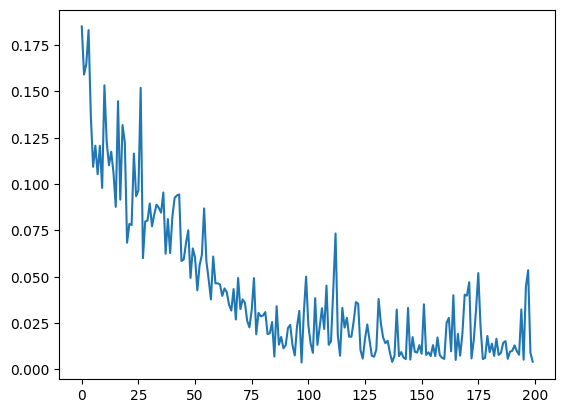

In [ ]:
# Example usage
num_epochs = 200
train(model, train_loader, optimizer, loss_fn, num_epochs)

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import torch

# Create a quantum circuit
def create_quantum_circuit(n_qubits):
    dev = qml.device("default.qubit", wires=n_qubits)

    @qml.qnode(dev, interface='torch')
    def quantum_circuit(weights):
        for i in range(n_qubits):
            qml.RX(weights[i, 0], wires=i)
            qml.RY(weights[i, 1], wires=i)
            qml.RZ(weights[i, 2], wires=i)
        for i in range(n_qubits - 1):
            qml.CNOT(wires=[i, i + 1])
        qml.CNOT(wires=[n_qubits - 1, 0])
        return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

    return quantum_circuit

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class QuantumGNN(nn.Module):
    def __init__(self, in_channels, out_channels, num_qubits):
        super(QuantumGNN, self).__init__()
        self.classical_gnn = GCNConv(in_channels, out_channels)
        self.num_qubits = num_qubits
        self.qc_weights = nn.Parameter(torch.rand((num_qubits, 3)))
        self.quantum_circuit = create_quantum_circuit(num_qubits)
        self.fc = nn.Linear(4, 1)  # Linear layer to map from 4 outputs to 1 scalar

    def forward(self, x, edge_index):
        x = self.classical_gnn(x, edge_index)
        x = F.relu(x)  # Apply non-linearity
        quantum_features = []
        for i in range(x.size(0)):
            exp_values = self.quantum_circuit(self.qc_weights)
            exp_values_tensor = torch.tensor(exp_values, dtype=torch.float32)
            quantum_features.append(exp_values_tensor)
        quantum_features = torch.stack(quantum_features)
        output = self.fc(quantum_features)  # Apply linear layer to reduce to scalar
        return output.squeeze()  # Squeeze to match shape (20,)

In [ ]:
from torch.optim import Adam

# Initialize the model, loss function, and optimizer
model = QuantumGNN(in_channels=4, out_channels=1, num_qubits=4)
loss_fn = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.01)

# Training loop
n_epochs = 100
loss_list = []
acc_list = []
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(data.x, data.edge_index)
    loss = loss_fn(output, y.squeeze())  # Adjusted to match shape
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    compute_accuracy(output, data.y)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: loss = {loss.item()}")

# Test the model
model.eval()
with torch.no_grad():
    test_output = model(data.x, data.edge_index)
    print(f"Test output: {test_output.numpy()}")

print(loss_list)

NameError: name 'compute_accuracy' is not defined

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data, Batch
from torch.utils.data import DataLoader, Subset

from qiskit import QuantumCircuit, Aer, execute
import numpy as np

# Example data (replace with your actual dataset)
features = [
    [1.35861038e-01, 4.33190739e-01, 7.23854864e-01, 6.42867499e-01],
    [1.91416628e-01, 1.48580434e-01, 6.47027568e-01, 1.01263220e-03],
    [2.45159046e-02, 2.96262195e-01, 6.98300156e-01, 4.68653316e-01],
    [2.33411211e-01, 2.29922155e-02, 6.17154253e-01, 1.43750042e-01],
    [8.65225758e-03, 8.41720551e-03, 3.08829186e-01, 6.25104117e-01],
    [4.40873582e-02, 2.64421487e-02, 1.08695066e-02, 4.57901550e-02],
    [3.19866774e-01, 5.10297757e-01, 9.29257765e-02, 5.87295451e-01],
    [7.41897341e-01, 1.31248683e-01, 3.12081251e-01, 2.50288137e-01],
    [4.09967646e-01, 1.50511004e-01, 4.50170822e-01, 1.05786690e-01],
    [3.86397857e-01, 6.25510210e-02, 3.46820337e-01, 7.14295627e-01],
    [2.66177400e-01, 3.37566163e-02, 1.20424306e-01, 2.39210475e-01],
    [1.54736225e-01, 6.90052021e-02, 9.35892197e-03, 5.34491420e-02],
    [6.64768663e-02, 1.62425087e-01, 1.55037190e-01, 5.79719592e-01],
    [4.69672779e-01, 6.14861898e-01, 1.98803658e-01, 3.16083324e-01],
    [2.45746616e-02, 4.20866923e-01, 3.67888154e-01, 7.13204372e-01],
    [7.47500791e-03, 4.19251475e-01, 1.65165851e-01, 3.23104868e-01],
    [7.08260216e-01, 2.51658375e-01, 3.47291428e-01, 1.44125377e-01],
    [1.09899477e-01, 7.43669797e-01, 5.94164336e-01, 5.44618243e-03],
    [4.30978384e-01, 4.14356521e-01, 8.73689958e-02, 6.85356162e-01],
    [5.49875014e-01, 6.78690303e-01, 4.45855492e-01, 6.23977344e-02],
    [1.60029258e-03, 1.67751263e-01, 1.47890415e-03, 3.44112058e-02],
    [3.79214904e-01, 1.36798218e-01, 7.50136150e-01, 4.75124466e-01],
    [5.38834077e-01, 2.31292394e-03, 7.21795636e-02, 2.64044006e-01],
    [4.35380841e-02, 1.48323324e-01, 4.34478324e-01, 1.45301662e-04],
    [3.79092620e-01, 2.83889346e-01, 1.49971282e-03, 2.92298183e-01],
    [2.28660230e-01, 5.69297234e-01, 1.04413484e-01, 1.54388523e-01],
    [4.48029767e-01, 6.92230495e-02, 4.27572913e-01, 2.29121364e-02],
    [7.60860831e-01, 5.48129613e-02, 2.60602063e-01, 3.20782840e-01],
    [1.73316554e-01, 7.04697576e-01, 1.79893414e-02, 1.76858613e-02],
    [2.86143876e-01, 3.78235875e-01, 1.86175243e-01, 5.63495959e-01],
    [4.30275590e-01, 6.32115768e-02, 1.63744211e-01, 6.39314908e-01],
    [5.49821185e-01, 9.11236783e-02, 2.40921350e-02, 6.78421546e-01],
    [4.23458639e-01, 5.22810436e-01, 6.55897774e-01, 6.09394086e-01],
    [7.21273458e-01, 1.98210050e-01, 1.73459385e-01, 4.47013831e-01],
    [1.56708328e-01, 6.77941139e-01, 3.73985135e-01, 2.86291146e-02],
    [1.40263078e-01, 6.34842459e-01, 6.52423171e-01, 7.24051860e-01],
    [6.00011951e-01, 7.57760539e-01, 4.01181153e-01, 2.58953903e-03],
    [4.65495303e-01, 2.84306824e-01, 1.82108315e-01, 7.20455213e-01],
    [4.16986031e-01, 3.57272350e-01, 1.60097608e-02, 1.60938646e-01],
    [3.78431385e-02, 1.81197817e-01, 6.57047199e-01, 5.49038266e-01],
    [8.66376185e-02, 5.06832558e-01, 6.78364591e-01, 1.28622118e-01],
    [4.61740020e-01, 1.72449892e-01, 1.30863621e-01, 2.27453638e-01],
    [5.82916004e-01, 3.32458404e-01, 6.00767193e-01, 1.71157223e-01],
    [2.02065680e-01, 9.02389122e-02, 4.35705316e-03, 1.87210206e-01],
    [5.25668086e-01, 3.23044162e-01, 6.93012916e-01, 2.75926565e-01],
    [1.14414801e-01, 1.82309634e-01, 2.85924760e-01, 1.36458587e-03],
    [1.35970497e-02, 9.28615619e-02, 1.97751161e-01, 6.13909185e-01],
    [6.32460551e-03, 3.05815203e-02, 3.52285785e-01, 1.41551052e-01],
    [6.67752122e-02, 6.92354492e-01, 6.76353193e-01, 5.35952242e-01],
    [7.55322633e-01, 4.89145047e-03, 3.85562966e-01, 2.22391706e-01]
]

target = [
    1.  , 0.98, 0.96, 0.94, 0.92, 0.9 , 0.88, 0.86, 0.84, 0.82,
    0.8 , 0.78, 0.76, 0.74, 0.72, 0.7 , 0.68, 0.66, 0.64, 0.62,
    0.6 , 0.58, 0.56, 0.54, 0.52, 0.5 , 0.48, 0.46, 0.44, 0.42,
    0.4 , 0.38, 0.36, 0.34, 0.32, 0.3 , 0.28, 0.26, 0.24, 0.22,
    0.2 , 0.18, 0.16, 0.14, 0.12, 0.1 , 0.08, 0.06, 0.04, 0.02
]
num_nodes = len(features)
edge_index = torch.combinations(torch.arange(num_nodes)).t().contiguous()

# Convert features and target to torch tensors
x = torch.tensor(features, dtype=torch.float)
y = torch.tensor(target, dtype=torch.float)

# Create a PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, y=y)

# Define the size of the validation set (e.g., 20%)
val_size = int(0.2 * len(data))

# Create indices for train and validation sets
indices = list(range(len(data)))
train_indices = indices[val_size:]
val_indices = indices[:val_size]

# Create Subset objects from the Data object
train_data = Subset(data, train_indices)
val_data = Subset(data, val_indices)

# Custom collate function for DataLoader
def custom_collate(batch):
    return Batch.from_data_list(batch)

# Create DataLoader
batch_size = 5  # Adjust batch size as needed
train_loader = DataLoader([data], batch_size=batch_size, shuffle=True, collate_fn=custom_collate)
val_loader = DataLoader([val_data], batch_size=batch_size, shuffle=False, collate_fn=custom_collate)

# Quantum layer function using Qiskit
def quantum_layer(input_vector):
    num_qubits = len(input_vector)
    circuit = QuantumCircuit(num_qubits, num_qubits)

    # Apply Hadamard gate to each qubit
    for i in range(num_qubits):
        circuit.h(i)
        circuit.rx(input_vector[i].item(), i)

    circuit.measure(range(num_qubits), range(num_qubits))

    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circuit, simulator, shots=1).result()
    counts = result.get_counts(circuit)

    # Convert counts to output vector
    output_vector = np.array([counts.get(f'{i:0{num_qubits}b}', 0) for i in range(2 ** num_qubits)])
    return torch.tensor(output_vector, dtype=torch.float)

# Define a simple Quantum GNN model
class QuantumGNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(QuantumGNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = x.apply(quantum_layer)
        x = self.conv2(x, edge_index)
        return x

# Initialize model, loss function, and optimizer
model = QuantumGNN(input_dim=x.shape[1], hidden_dim=64, output_dim=1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
def train(model, train_loader, optimizer, loss_fn, num_epochs):
    import matplotlib.pyplot as plt
    model.train()
    loss_list = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for data in train_loader:
            optimizer.zero_grad()
            out = model(data.x, data.edge_index)
            loss = loss_fn(out, data.y.view(-1, 1))  # target is scalar (regression task)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * data.num_graphs
        epoch_loss /= len(train_loader.dataset)
        loss_list.append(epoch_loss)
        print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.4f}")
    return plt.plot([i for i in range(num_epochs)], loss_list)

# Train the model
train(model, train_loader, optimizer, loss_fn, num_epochs=50)


ImportError: Qiskit is installed in an invalid environment that has both Qiskit >=1.0 and an earlier version. You should create a new virtual environment, and ensure that you do not mix dependencies between Qiskit <1.0 and >=1.0. Any packages that depend on 'qiskit-terra' are not compatible with Qiskit 1.0 and will need to be updated. Qiskit unfortunately cannot enforce this requirement during environment resolution. See https://qisk.it/packaging-1-0 for more detail.